In [ ]:
import pandas as pd
df = pd.read_csv("lastofus.csv", index_col=0)
df["created_utc"] = pd.to_datetime(df["created_utc"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.dtypes

body                   object
created_utc    datetime64[ns]
author                 object
upvotes                 int64
dtype: object

In [ ]:
df

,body,created_utc,author,upvotes
0,This is a **general discussion hub** for the o...,2023-01-17 00:50:41,UltraDangerLord,1
1,Joel's post-apocalyptic apartment is better th...,2023-01-17 02:59:55,pyRSL64,276
2,Sometimes they are even moving like in the gam...,2023-01-17 00:54:13,Administrative_Net80,127
3,"I just finished the first episode, and I reall...",2023-01-17 01:51:03,folder_finder,105
4,Anybody else notice the bookmarked page of the...,2023-01-17 05:08:04,dolpgg,99
...,...,...,...,...
476,I think you're gonna like seasons 2&3.,2023-03-19 13:57:25,devilskind86,3
477,I mean that’s just not the reality of the worl...,2023-03-26 15:58:45,pandaunited7,2
478,I agree as I thought the finale was ridiculous...,2023-03-18 05:02:48,AfricanusEmeritus,2
479,It existed all the way back in the 70s. Jimmy ...,2023-02-17 03:52:52,Little_Plankton4001,2


In [ ]:
#Q1
df["upvotes"].describe()

count    481.000000
mean      11.692308
std       21.105216
min        1.000000
25%        3.000000
50%        5.000000
75%       12.000000
max      276.000000
Name: upvotes, dtype: float64

In [ ]:
df["created_utc"]

In [ ]:
#Q2
df["created_utc"].min()

Timestamp('2023-01-16 20:42:25')

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

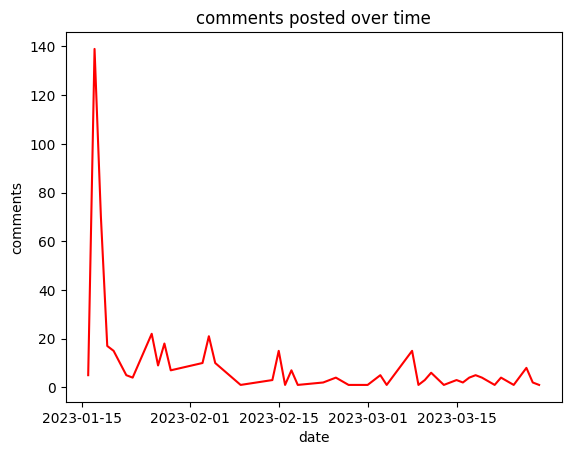

In [ ]:
#Q3
df.groupby(df["created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="r")

<Axes: title={'center': 'no. comments posted by the top 15 authors'}, xlabel='author', ylabel='comments'>

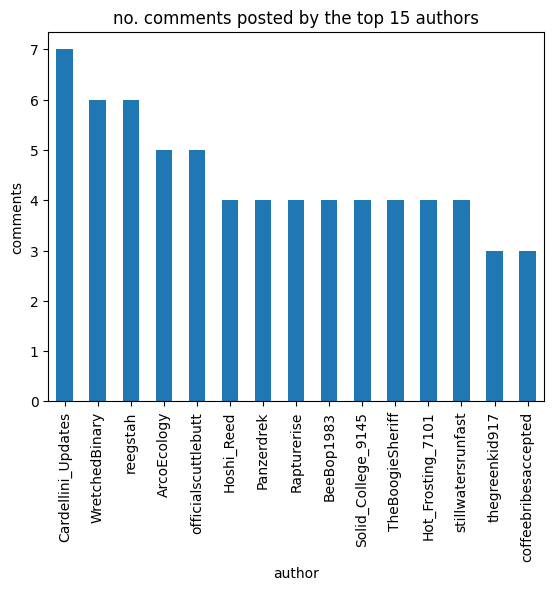

In [ ]:
#Q4
df.groupby(df["author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors")

In [ ]:
#Q5
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

def preprocess(row):
  text = row["body"]
  text = text.lower() #converts_to_lowercase
  keep = []
  for word in text.split():
    if word not in stopwords.words("english"):
      keep.append(word)
  return ' '.join(keep)

df["cleaned_body"] = df.apply(preprocess, axis=1)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,body,created_utc,author,upvotes,cleaned_body
0,This is a **general discussion hub** for the o...,2023-01-17 00:50:41,UltraDangerLord,1,**general discussion hub** overall season! pla...
1,Joel's post-apocalyptic apartment is better th...,2023-01-17 02:59:55,pyRSL64,276,joel's post-apocalyptic apartment better curre...
2,Sometimes they are even moving like in the gam...,2023-01-17 00:54:13,Administrative_Net80,127,sometimes even moving like game... played game...
3,"I just finished the first episode, and I reall...",2023-01-17 01:51:03,folder_finder,105,"finished first episode, really loved it. thoug..."
4,Anybody else notice the bookmarked page of the...,2023-01-17 05:08:04,dolpgg,99,anybody else notice bookmarked page billboards...
...,...,...,...,...,...
476,I think you're gonna like seasons 2&3.,2023-03-19 13:57:25,devilskind86,3,think gonna like seasons 2&3.
477,I mean that’s just not the reality of the worl...,2023-03-26 15:58:45,pandaunited7,2,mean that’s reality world. traveling world dan...
478,I agree as I thought the finale was ridiculous...,2023-03-18 05:02:48,AfricanusEmeritus,2,agree thought finale ridiculous. choices made ...
479,It existed all the way back in the 70s. Jimmy ...,2023-02-17 03:52:52,Little_Plankton4001,2,existed way back 70s. jimmy carter installed r...


In [ ]:
#Q6
from collections import Counter

word_counter = Counter()
for row in df.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["cleaned_body"].split()) #tokenization
df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf.columns = ["term", "frequency"]
df_tf

,term,frequency
0,like,133
1,game,95
2,would,71
3,show,67
4,joel,66
5,really,56
6,one,55
7,episode,55
8,think,52
9,first,48


In [ ]:
#Q7
!pip install wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.save("wordcloud.png")


In [ ]:
#Q8
df[df["cleaned_body"].str.contains("ellie")]["cleaned_body"].size

48

In [ ]:
#Q9
!pip install gensim
import gensim
import gensim.corpora as corpora

from pprint import pprint

documents = [comment.split() for comment in df["cleaned_body"]] #tokenizing_the_words
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())


[(0,
  '0.010*"would" + 0.008*"game" + 0.007*"like" + 0.007*"one" + '
  '0.005*"probably" + 0.005*"also" + 0.005*"thought" + 0.004*"good" + '
  '0.004*"episode" + 0.004*"infected"'),
 (1,
  '0.008*"like" + 0.007*"game" + 0.006*"really" + 0.006*"it’s" + '
  '0.004*"played" + 0.004*"episode" + 0.004*"people" + 0.004*"going" + '
  '0.004*"get" + 0.004*"world"'),
 (2,
  '0.011*"show" + 0.011*"like" + 0.008*"game" + 0.006*"would" + 0.006*"joel" + '
  '0.005*"first" + 0.005*"love" + 0.005*"got" + 0.005*"zombie" + '
  '0.004*"really"'),
 (3,
  '0.012*"joel" + 0.009*"like" + 0.007*"show" + 0.006*"game" + 0.006*"never" + '
  '0.006*"ellie" + 0.006*"got" + 0.004*"really" + 0.004*"something" + '
  '0.004*"know"'),
 (4,
  '0.016*"like" + 0.012*"game" + 0.008*"first" + 0.007*"think" + '
  '0.006*"people" + 0.006*"show" + 0.005*"played" + 0.005*"ellie" + '
  '0.004*"joel" + 0.004*"see"'),
 (5,
  '0.016*"like" + 0.007*"ellie" + 0.007*"would" + 0.006*"episode" + '
  '0.006*"game" + 0.006*"never" + 0.0